In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import pickle
#import warnings
#warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

### Data reading and feature scaling with MinMaxScaler()

In [2]:
data = pd.read_csv('df_final_with10.csv')

In [3]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [12]:
data

,Day,Month,Humidity,Wind,Rain,DMC,DC,Spread,Region,Classes
0,27,9,87,15,4.4,6.5,8.0,0.1,0,0
1,13,9,86,21,4.6,1.3,7.5,0.1,1,0
2,1,9,86,16,0.0,0.9,8.2,0.1,0,0
3,20,6,80,16,0.4,3.4,27.1,0.9,1,0
4,14,6,79,16,0.7,6.4,7.3,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...
270,19,9,41,8,0.1,24.9,86.0,2.7,0,1
271,21,9,34,17,0.0,23.6,97.3,13.8,0,1
272,22,9,64,13,0.0,26.1,106.3,7.1,0,1
273,23,9,56,14,0.0,29.4,115.6,7.5,0,1


In [13]:
X_columns  = ['Humidity', 'Wind', 'Rain', 'DMC', 'DC', 'Spread']
X_scale = data[X_columns]

In [14]:
#scaling data
df = data.copy()
from sklearn.preprocessing import MinMaxScaler
Mim_max_X = MinMaxScaler()


X_part = pd.DataFrame(Mim_max_X.fit_transform(X_scale), columns = X_columns)


In [15]:
X_part.head()

,Humidity,Wind,Rain,DMC,DC,Spread
0,0.956522,0.470588,0.628571,0.113060,0.005152,0.005263
1,0.942029,0.823529,0.657143,0.011696,0.002810,0.005263
2,0.942029,0.529412,0.000000,0.003899,0.006089,0.005263
3,0.855072,0.529412,0.057143,0.052632,0.094614,0.047368
4,0.840580,0.529412,0.100000,0.111111,0.001874,0.026316


In [16]:
df = data.copy()
df.drop(X_columns,axis = 1, inplace = True)

In [17]:
df_new = df.join(X_part)

In [18]:
col_order = data.columns
df_new = df_new[col_order]

In [19]:
df_new

,Day,Month,Humidity,Wind,Rain,DMC,DC,Spread,Region,Classes
0,27,9,0.956522,0.470588,0.628571,0.113060,0.005152,0.005263,0,0
1,13,9,0.942029,0.823529,0.657143,0.011696,0.002810,0.005263,1,0
2,1,9,0.942029,0.529412,0.000000,0.003899,0.006089,0.005263,0,0
3,20,6,0.855072,0.529412,0.057143,0.052632,0.094614,0.047368,1,0
4,14,6,0.840580,0.529412,0.100000,0.111111,0.001874,0.026316,0,0
...,...,...,...,...,...,...,...,...,...,...
270,19,9,0.289855,0.058824,0.014286,0.471735,0.370492,0.142105,0,1
271,21,9,0.188406,0.588235,0.000000,0.446394,0.423419,0.726316,0,1
272,22,9,0.623188,0.352941,0.000000,0.495127,0.465574,0.373684,0,1
273,23,9,0.507246,0.411765,0.000000,0.559454,0.509133,0.394737,0,1


### Train and test data splitting

In [20]:
X = df_new.drop('Classes', axis = 1)
y = df_new['Classes']

In [43]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

### KNN Classifier with GridSearchCV

In [22]:
from sklearn.neighbors import KNeighborsClassifier
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [23]:
knn_cv.predict(X_test)

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0], dtype=int64)

In [24]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.8468468468468469
Best Parameters: {'n_neighbors': 1}


### KNN searching best n_neighbor value manually

In [25]:
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [26]:
print(train_scores)
print(test_scores)

[1.0, 0.9453551912568307, 0.9398907103825137, 0.912568306010929, 0.8961748633879781, 0.8306010928961749, 0.825136612021858, 0.8087431693989071, 0.7650273224043715, 0.7868852459016393, 0.7540983606557377, 0.7213114754098361, 0.7213114754098361, 0.7049180327868853]
[0.8369565217391305, 0.7934782608695652, 0.7608695652173914, 0.7282608695652174, 0.782608695652174, 0.7934782608695652, 0.7717391304347826, 0.7717391304347826, 0.7608695652173914, 0.7391304347826086, 0.7608695652173914, 0.717391304347826, 0.7065217391304348, 0.7391304347826086]


#### n_neighbor value is same as gridsearchcv

max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

In [27]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 83.69565217391305 % and k = [1]


In [28]:
y_pred = knn.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1], dtype=int64)

### Confusion matrix and Classification report

In [29]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,34,12,46
1,12,34,46
All,46,46,92


Text(0.5, 15.0, 'Predicted label')

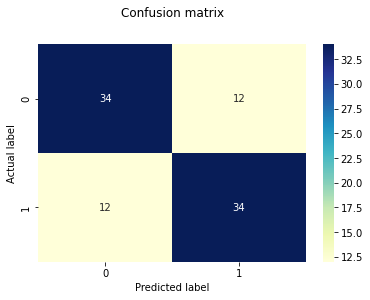

In [30]:
# Creating a Heatmap for the confusion matrix. 
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82        46
           1       0.85      0.74      0.79        46

    accuracy                           0.80        92
   macro avg       0.81      0.80      0.80        92
weighted avg       0.81      0.80      0.80        92



### Logistic Regression with GridSearchCV for parameter tuning

In [35]:
##Appy Logistic regression
from sklearn.linear_model import LogisticRegression
lg_reg = LogisticRegression(random_state = 2)

#import GridSearchCV
from sklearn.model_selection import GridSearchCV
parameters = {
    'penalty' : ['l1','l2', 'elasticnet'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}
log_reg = LogisticRegression(random_state = 2)
logreg_cv= GridSearchCV(log_reg,parameters, cv=5)
logreg_cv.fit(X_train,y_train)


D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit fai

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit fai

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit fai

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver 

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit fai

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=2),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [36]:
logreg_cv.predict(X_test)

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1], dtype=int64)

### Accuracy, classification report and best parameters 

In [37]:
print("Best Score:" + str(logreg_cv.best_score_))
print("Best Parameters: " + str(logreg_cv.best_params_))

Best Score:0.9782282282282282
Best Parameters: {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}


In [38]:
logreg_best = LogisticRegression(C = 10, 
                            penalty = 'l1', 
                            solver = 'liblinear')
logreg_best.fit(X_train,y_train)
y_pred = logreg_best.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1], dtype=int64)

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       1.00      0.98      0.99        46

    accuracy                           0.99        92
   macro avg       0.99      0.99      0.99        92
weighted avg       0.99      0.99      0.99        92



### SVM Model with GridSearchCV and Evaluation

In [45]:
### Apply SVM model

from sklearn.svm import SVC
clssfr = SVC(random_state = 2)
parameters = {
    'kernel'  : ['linear', 'poly', 'rbf', 'sigmoid'], 
    'C'       : np.logspace(-3,3,7),
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
}
clssfr_cv= GridSearchCV(clssfr,parameters, cv=5)
clssfr_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=2),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [46]:
print(clssfr_cv.predict(X_test))
print("Best Score:" + str(clssfr_cv.best_score_))
print("Best Parameters: " + str(clssfr_cv.best_params_))


[1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1
 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1
 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1]
Best Score:0.9726726726726727
Best Parameters: {'C': 1000.0, 'gamma': 1, 'kernel': 'linear'}


In [47]:
y_pred = clssfr_cv.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       1.00      0.98      0.99        46

    accuracy                           0.99        92
   macro avg       0.99      0.99      0.99        92
weighted avg       0.99      0.99      0.99        92



### Decision tree and parameter tuning and evaluation

In [63]:
### Apply Decision tree model

from sklearn.tree import DecisionTreeClassifier
clssfr_dcsn_tree = DecisionTreeClassifier(random_state = 2)

parameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'min_samples_leaf'       : np.arange(1,10)
    
}
clssfr_dcsn_tree_cv= GridSearchCV(clssfr_dcsn_tree, parameters, cv=5)
clssfr_dcsn_tree_cv.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 348, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-pa

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [64]:
print(clssfr_dcsn_tree_cv.predict(X_test))
print("Best Score:" + str(clssfr_dcsn_tree_cv.best_score_))
print("Best Parameters: " + str(clssfr_dcsn_tree_cv.best_params_))

[1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1
 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1
 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1]
Best Score:0.9836336336336338
Best Parameters: {'criterion': 'gini', 'min_samples_leaf': 1}


In [65]:
y_pred = clssfr_dcsn_tree_cv.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       1.00      0.98      0.99        46

    accuracy                           0.99        92
   macro avg       0.99      0.99      0.99        92
weighted avg       0.99      0.99      0.99        92



### NaiveBayes and Evaluation

In [56]:
### Apply Naive Bayes model
from sklearn.naive_bayes import BernoulliNB
clssfr = BernoulliNB()

#import GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {
    'alpha':[1,0]
    
    
}
clssfr_cv= GridSearchCV(clssfr,parameters, cv=5)
clssfr_cv.fit(X_train,y_train)


D:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
D:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
D:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
D:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
D:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too

GridSearchCV(cv=5, estimator=BernoulliNB(), param_grid={'alpha': [1, 0]})

In [57]:
print(clssfr_cv.predict(X_test))
print("Best Score:" + str(clssfr_cv.best_score_))
print("Best Parameters: " + str(clssfr_cv.best_params_))

[1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1
 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1
 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1]
Best Score:0.8142642642642641
Best Parameters: {'alpha': 1}


In [58]:
y_pred = clssfr_cv.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78        46
           1       0.75      0.87      0.81        46

    accuracy                           0.79        92
   macro avg       0.80      0.79      0.79        92
weighted avg       0.80      0.79      0.79        92



### RandomForest with best parameters and evaluation

In [60]:
### Apply Random Forest model

from sklearn.ensemble import RandomForestClassifier
clssfr = RandomForestClassifier(random_state = 2)

parameters = {
    
 'bootstrap': [True, False],
 'max_depth': np.arange(4,10),
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'n_estimators': [200, 400, 600]

}

clssfr_cv= GridSearchCV(clssfr, parameters, cv=5)
clssfr_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2),
             param_grid={'bootstrap': [True, False],
                         'max_depth': array([4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [200, 400, 600, 800, 1000]})

In [61]:
print(clssfr_cv.predict(X_test))
print("Best Score:" + str(clssfr_cv.best_score_))
print("Best Parameters: " + str(clssfr_cv.best_params_))

[1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1
 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1
 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1]
Best Score:0.9837837837837838
Best Parameters: {'bootstrap': True, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 200}


In [62]:
y_pred = clssfr_cv.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       1.00      0.98      0.99        46

    accuracy                           0.99        92
   macro avg       0.99      0.99      0.99        92
weighted avg       0.99      0.99      0.99        92



### Select the best classification model based on accuracy-precision-recall and dump to use later

In [67]:
#best model can be selected as decision tree classifier

pickle.dump(clssfr_dcsn_tree_cv, open("class_model.pkl", 'wb'))
##my_model = pickle.load(open("class_model.pkl", "rb"))

# Regression modeling 

In [68]:
#dependent variable will be rain column and remaining columns except categoricals go through minmax scale

In [69]:
X_columns  = ['Humidity', 'Wind',  'DMC', 'DC', 'Spread']
X_scale = data[X_columns]

In [70]:
#scaling data
df = data.copy()
from sklearn.preprocessing import MinMaxScaler
Mim_max_X = MinMaxScaler()


X_part = pd.DataFrame(Mim_max_X.fit_transform(X_scale), columns = X_columns)

In [71]:
X_part.head()



,Humidity,Wind,DMC,DC,Spread
0,0.956522,0.470588,0.113060,0.005152,0.005263
1,0.942029,0.823529,0.011696,0.002810,0.005263
2,0.942029,0.529412,0.003899,0.006089,0.005263
3,0.855072,0.529412,0.052632,0.094614,0.047368
4,0.840580,0.529412,0.111111,0.001874,0.026316


In [72]:
df = data.copy()

In [73]:
df.drop(X_columns,axis = 1, inplace = True)
df_new = df.join(X_part)


In [76]:
col_order = ['Day', 'Month', 'Humidity', 'Wind', 'DMC', 'DC', 'Spread',
       'Region', 'Classes', 'Rain']

In [95]:

df_new = df_new[col_order]
df_new


,Day,Month,Humidity,Wind,DMC,DC,Spread,Region,Classes,Rain
0,27,9,0.956522,0.470588,0.113060,0.005152,0.005263,0,0,4.4
1,13,9,0.942029,0.823529,0.011696,0.002810,0.005263,1,0,4.6
2,1,9,0.942029,0.529412,0.003899,0.006089,0.005263,0,0,0.0
3,20,6,0.855072,0.529412,0.052632,0.094614,0.047368,1,0,0.4
4,14,6,0.840580,0.529412,0.111111,0.001874,0.026316,0,0,0.7
...,...,...,...,...,...,...,...,...,...,...
270,19,9,0.289855,0.058824,0.471735,0.370492,0.142105,0,1,0.1
271,21,9,0.188406,0.588235,0.446394,0.423419,0.726316,0,1,0.0
272,22,9,0.623188,0.352941,0.495127,0.465574,0.373684,0,1,0.0
273,23,9,0.507246,0.411765,0.559454,0.509133,0.394737,0,1,0.0


In [104]:
X = df_new.drop('Rain', axis = 1)
y = df_new['Rain']
y.values

array([4.4, 4.6, 0. , 0.4, 0.7, 0.7, 0. , 4.4, 3.8, 0.2, 4.7, 4.7, 0. ,
       0.2, 0.5, 0.7, 7. , 0.2, 7. , 1.3, 0. , 0. , 0.3, 1.3, 0.7, 0. ,
       0. , 0.1, 7. , 0.6, 0.2, 0. , 1.8, 2.9, 5.8, 7. , 0.4, 0. , 0.8,
       0.4, 1.8, 1.8, 0.9, 1.8, 0. , 0. , 0.7, 7. , 2. , 0. , 0. , 0. ,
       0. , 0.8, 1. , 2.5, 0. , 0. , 0.1, 0.5, 3.1, 7. , 1.3, 2.9, 0.4,
       0. , 2. , 0.1, 1.2, 0.9, 0.4, 0.2, 1.7, 0.3, 1.8, 0.5, 2.5, 1.3,
       0.2, 0.4, 0.2, 2.5, 0.4, 0. , 1.4, 1. , 3.1, 0.1, 0. , 0.4, 1.8,
       0.2, 0.1, 0.2, 1. , 0.4, 0.7, 0.2, 0.2, 1.8, 7. , 1.1, 0.8, 2.2,
       7. , 0.7, 0.1, 0. , 0. , 7. , 0.4, 0.4, 0.1, 4. , 0. , 2. , 0.5,
       0. , 0. , 1.2, 0. , 1.4, 0.7, 1.7, 1.2, 0.4, 0.4, 0.1, 0. , 0.2,
       4.4, 7. , 0.6, 0. , 0. , 0.7, 0.6, 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0.3, 0.3, 0. , 0. , 0. , 0.

### Linear Regression and evaluation with mse and r2

In [105]:
#importing train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regressor=LinearRegression()

mse=cross_val_score(lin_regressor,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse) #train data result
print(mean_mse)

-2.204835358465001


In [107]:
mse=cross_val_score(lin_regressor,X_test,y_test,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse) #test data result
print(mean_mse)

-1.2580161526887437


In [108]:
from sklearn.metrics import r2_score, mean_squared_error
lin_regressor.fit(X_train, y_train)
y_pred= lin_regressor.predict(X_test)
print("r2_score:", r2_score(y_test, y_pred))
print("mean_squared_error: ",mean_squared_error(y_test, y_pred))

r2_score: 0.10821478043358923
mean_squared_error:  1.2032174856765678


### Ridge regression with hyperparameter tuning and evaluation

In [109]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.01}
-2.203555890360838


In [110]:
from sklearn.metrics import r2_score, mean_squared_error
ridge_regressor.fit(X_train, y_train)
y_pred= ridge_regressor.predict(X_test)
print("r2_score:", r2_score(y_test, y_pred))
print("mean_squared_error: ",mean_squared_error(y_test, y_pred))

r2_score: 0.11231860244077674
mean_squared_error:  1.1976805129965842


### Lasso with GridSearchCV and evaluation with r2 and mse

In [111]:
from sklearn.linear_model import Lasso
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.01228754261564, tolerance: 0.0636038
  model = cd_fast.enet_coordinate_descent(


{'alpha': 0.01}
-2.0779085008489604


In [112]:
lasso_regressor.fit(X_train, y_train)
y_pred= lasso_regressor.predict(X_test)
print("r2_score:", r2_score(y_test, y_pred))
print("mean_squared_error: ",mean_squared_error(y_test, y_pred))

r2_score: 0.1294206229820002
mean_squared_error:  1.1746060667015394


### ElasticSearch and Evaluation

In [113]:
from sklearn.linear_model import ElasticNet
regress=ElasticNet()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
regressor_cv=GridSearchCV(regress,parameters,scoring='neg_mean_squared_error',cv=5)

regressor_cv.fit(X,y)
print(regressor_cv.best_params_)
print(regressor_cv.best_score_)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42.615606695825306, tolerance: 0.0359253590909091
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.184202178622172, tolerance: 0.0636038
  model = cd_fast.enet_coordinate_descent(


{'alpha': 0.01}
-2.0082479127931334


In [114]:
from sklearn.metrics import r2_score, mean_squared_error
regressor_cv.fit(X_train, y_train)
y_pred= regressor_cv.predict(X_test)
print("r2_score:", r2_score(y_test, y_pred))
print("mean_squared_error: ",mean_squared_error(y_test, y_pred))

D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.087361565501681, tolerance: 0.0430574025974026
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.339636156647032, tolerance: 0.05169499350649351
  model = cd_fast.enet_coordinate_descent(


r2_score: 0.1487923585688029
mean_squared_error:  1.1484692677565236


### SVR and r2-mse values

In [117]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
regress=SVR()
parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
regressor_cv=GridSearchCV(regress,parameters,scoring='neg_mean_squared_error',cv=5)

regressor_cv.fit(X,y)
print(regressor_cv.best_params_)
print(regressor_cv.best_score_)
print(regressor_cv.score)


{'C': 1.5, 'epsilon': 0.5, 'gamma': 1e-07, 'kernel': 'linear'}
-2.209624732218151
<bound method BaseSearchCV.score of GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1.5, 2, 3, 10], 'epsilon': [0.1, 0.2, 0.5, 0.3],
                         'gamma': [1e-07, 0.0001],
                         'kernel': ('linear', 'rbf', 'poly')},
             scoring='neg_mean_squared_error')>


In [118]:
from sklearn.metrics import r2_score, mean_squared_error
regressor_cv.fit(X_train, y_train)
y_pred= regressor_cv.predict(X_test)
print("r2_score:", r2_score(y_test, y_pred))
print("mean_squared_error: ",mean_squared_error(y_test, y_pred))

r2_score: 0.1981594752530016
mean_squared_error:  1.081861998754304


### DecisionTree Regression and parameter tuning

In [119]:
from sklearn.tree import DecisionTreeRegressor
regress=DecisionTreeRegressor()
parameters = {'criterion': ("squared_error", "friedman_mse", "absolute_error", "poisson"), 'min_samples_split':np.arange(2,10)}
regressor_cv=GridSearchCV(regress,parameters,scoring='neg_mean_squared_error',cv=5)

regressor_cv.fit(X,y)
print(regressor_cv.best_params_)
print(regressor_cv.best_score_)
print(regressor_cv.score)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 351, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\s

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 351, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\s

{'criterion': 'friedman_mse', 'min_samples_split': 7}
-1.1324827575757577
<bound method BaseSearchCV.score of GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ('squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='neg_mean_squared_error')>


D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [        nan         nan         nan         nan         nan         nan
         nan         nan -1.4412     -1.31280909 -1.30280202 -1.17152273
 -1.17927018 -1.13248276 -1.15208686 -1.20801569         nan         nan
         nan         nan         nan         nan         nan         nan
 -1.99630592 -1.46028121 -1.92048378 -1.85316626 -1.56568869 -1.53232495
 -1.68297066 -1.65663763]
  warnings.warn(


In [120]:
from sklearn.metrics import r2_score, mean_squared_error
regressor_cv.fit(X_train, y_train)
y_pred= regressor_cv.predict(X_test)
print("r2_score:", r2_score(y_test, y_pred))
print("mean_squared_error: ",mean_squared_error(y_test, y_pred))

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 351, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\s

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 351, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\s

r2_score: -0.8831895253259883
mean_squared_error:  2.5408433734939755


D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [        nan         nan         nan         nan         nan         nan
         nan         nan -1.0531309  -1.18035425 -1.1118938  -1.42121034
 -1.11680258 -1.51808515 -1.40326848 -1.3918051          nan         nan
         nan         nan         nan         nan         nan         nan
 -1.40986434 -1.86841952 -1.88875547 -2.05754701 -1.50574044 -1.85224966
 -1.59778289 -1.51746994]
  warnings.warn(


### RandomForest and evaluation

In [128]:
from sklearn.ensemble import RandomForestRegressor
regress=RandomForestRegressor()
parameters = {
    'max_depth': [80,  110],
    'min_samples_leaf': [3, 4, 5],
    'n_estimators': [100, 200, 300, 1000]
              
             }
regressor_cv=GridSearchCV(regress,parameters,scoring='neg_mean_squared_error',cv=5)

regressor_cv.fit(X,y)
print(regressor_cv.best_params_)
print(regressor_cv.best_score_)
print(regressor_cv.score)

{'max_depth': 80, 'min_samples_leaf': 3, 'n_estimators': 200}
-1.1207509307754635
<bound method BaseSearchCV.score of GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [80, 110], 'min_samples_leaf': [3, 4, 5],
                         'n_estimators': [100, 200, 300, 1000]},
             scoring='neg_mean_squared_error')>


In [129]:
from sklearn.metrics import r2_score, mean_squared_error
regressor_cv.fit(X_train, y_train)
y_pred= regressor_cv.predict(X_test)
print("r2_score:", r2_score(y_test, y_pred))
print("mean_squared_error: ",mean_squared_error(y_test, y_pred))

r2_score: 0.151849389972599
mean_squared_error:  1.1443446494531408


###  Best model is random forest, dump for prediction of rain 

In [130]:
pickle.dump(regressor_cv, open("regression_model.pkl", 'wb'))
##my_model = pickle.load(open("class_model.pkl", "rb"))